In [1]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 55.9 MB/s eta 0:00:00:00:010:01


In [43]:
import cv2
import numpy as np
import rasterio
import matplotlib.pyplot as plt


def cloud_shadow_detection(toa_file, T1, t2, t3, t4, T5, T6, T7, T8):
    
    with rasterio.open(toa_file) as src:
        toa_image = src.read().astype(np.float32)
    
    B = toa_image[0]
    G = toa_image[1] 
    R = toa_image[2]
    
    ci_1 = (3 * R) / (G + B + 1e-10)
    ci_2 = (B + G + R) / 3
    
    T2 = np.mean(ci_2) + (t2 * (np.max(ci_2) - np.mean(ci_2)))
    
    prelim_cloud_mask = np.float32(np.logical_and(np.abs(ci_1 - 1) < T1, ci_2 > T2))
    final_cloud_mask = cv2.medianBlur(prelim_cloud_mask, T7)
    final_cloud_mask = np.expand_dims(final_cloud_mask, axis = 2).astype(np.uint8)
    
    plt.imshow(final_cloud_mask, cmap='Blues_r')
    plt.axis('off')
    plt.show()

    T3 = np.min(R) + (t3 * (np.mean(R) - np.min(R)))
    T4 = np.min(B) + (t4 * (np.mean(B) - np.min(B)))
    
    prelim_cloud_shadow_mask = np.float32(np.logical_and(R < T3, B < T4))

    plt.imshow(prelim_cloud_shadow_mask, cmap='Reds')
    plt.axis('off')
    plt.show()
    # dilation_kernel_size = 50

    # kernel_dilate = np.ones((dilation_kernel_size, dilation_kernel_size), np.uint8)
    # dilated_mask = cv2.dilate(prelim_cloud_shadow_mask.astype(np.uint8), kernel_dilate, iterations=1)
    # plt.imshow(dilated_mask, cmap='Blues')
    # plt.axis('off')
    # plt.show()

    # # shadow_mask = np.where((dilated_mask == 1) & (cloud_mask == 0), 1, 0)
    # shadow_mask = np.float32(np.logical_and(dilated_mask, prelim_cloud_shadow_mask))
    # plt.imshow(shadow_mask, cmap='Reds')
    # plt.axis('off')
    # plt.show()

    # spatial_search_kernel = np.ones((T5, T6), dtype = np.float32)
    # non_pseudo_cloud_shadow_position_mask = cv2.filter2D(final_cloud_mask, -1, spatial_search_kernel) > 1

    # plt.imshow(non_pseudo_cloud_shadow_position_mask, cmap='Reds')
    # plt.axis('off')
    # plt.show()
    
    # refined_cloud_shadow_mask = np.float32(np.logical_and(prelim_cloud_shadow_mask, non_pseudo_cloud_shadow_position_mask))

    # plt.imshow(refined_cloud_shadow_mask, cmap='Reds')
    # plt.axis('off')
    # plt.show()
    
    # final_cloud_shadow_mask = cv2.medianBlur(refined_cloud_shadow_mask, T8)
    # final_cloud_shadow_mask = np.expand_dims(final_cloud_shadow_mask, axis = 2).astype(np.uint8)

    # plt.imshow(final_cloud_shadow_mask, cmap='Reds')
    # plt.axis('off')
    # plt.show()

    
    # metadata['count'] = 1
    # metadata['dtype'] = 'uint8'
    
    # with rasterio.open(output_cloud_mask_file, 'w', **metadata) as dst:
    #     dst.write(np.transpose(final_cloud_mask, [2, 0, 1]))
        
    # with rasterio.open(output_cloud_shadow_mask_file, 'w', **metadata) as dst2:
    #     dst2.write(np.transpose(final_cloud_shadow_mask, [2, 0, 1]))
        
    # return final_cloud_mask, final_cloud_shadow_mask

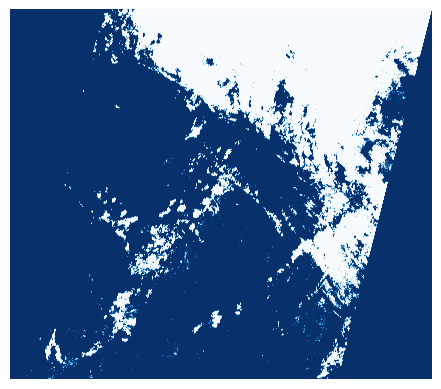

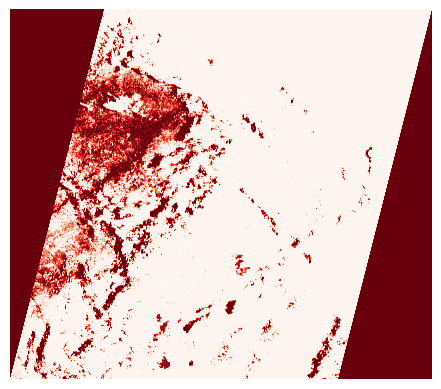

In [48]:
cloud_shadow_detection(
    toa_file="/kaggle/input/toa-corrected-resourcesat-22a-scenes/Train Data/RAF22JUN2024039131009200052_TOA.tif",
    T1=1,
    t2=0.03,
    t3=0.9,
    t4=0.65,
    T5 = 30,
    T6 = 30,
    T7=3,   # Must be odd
    T8=3    # Not used here, but available for shadow filtering
)

🏷️ Memory-Efficient LISS-4 Label Generator (TIF Input)
📊 Initial: Using 183MB, Available: 30800MB
📂 Loading TOA data efficiently from TIF: R2F02FEB2025071568010100068_TOA.tif
   TIF shape: (3, 16190, 17959)
   TIF data type: float32
   Converted shape: (16190, 17959, 3)
✅ TOA Data loaded efficiently from TIF:
   Final shape: (16190, 17959, 3)
   Data type: float32
   Value range: [0.0000, 1.0000]
   Memory usage: ~3327MB
📊 After loading TOA data from TIF: Using 3526MB, Available: 27421MB
⚙️ Setting up ultra-conservative detection parameters...
   Ultra-conservative parameters set for better water/shadow separation
🚀 MEMORY-EFFICIENT LISS-4 PIPELINE (TIF INPUT)
🔬 Calculating spectral indices in memory-efficient chunks...
   Processing 288 chunks of size 1024x1024
   Processed 20/288 chunks
   Processed 40/288 chunks
   Processed 60/288 chunks
   Processed 80/288 chunks
   Processed 100/288 chunks
   Processed 120/288 chunks
   Processed 140/288 chunks
   Processed 160/288 chunks
   Proc

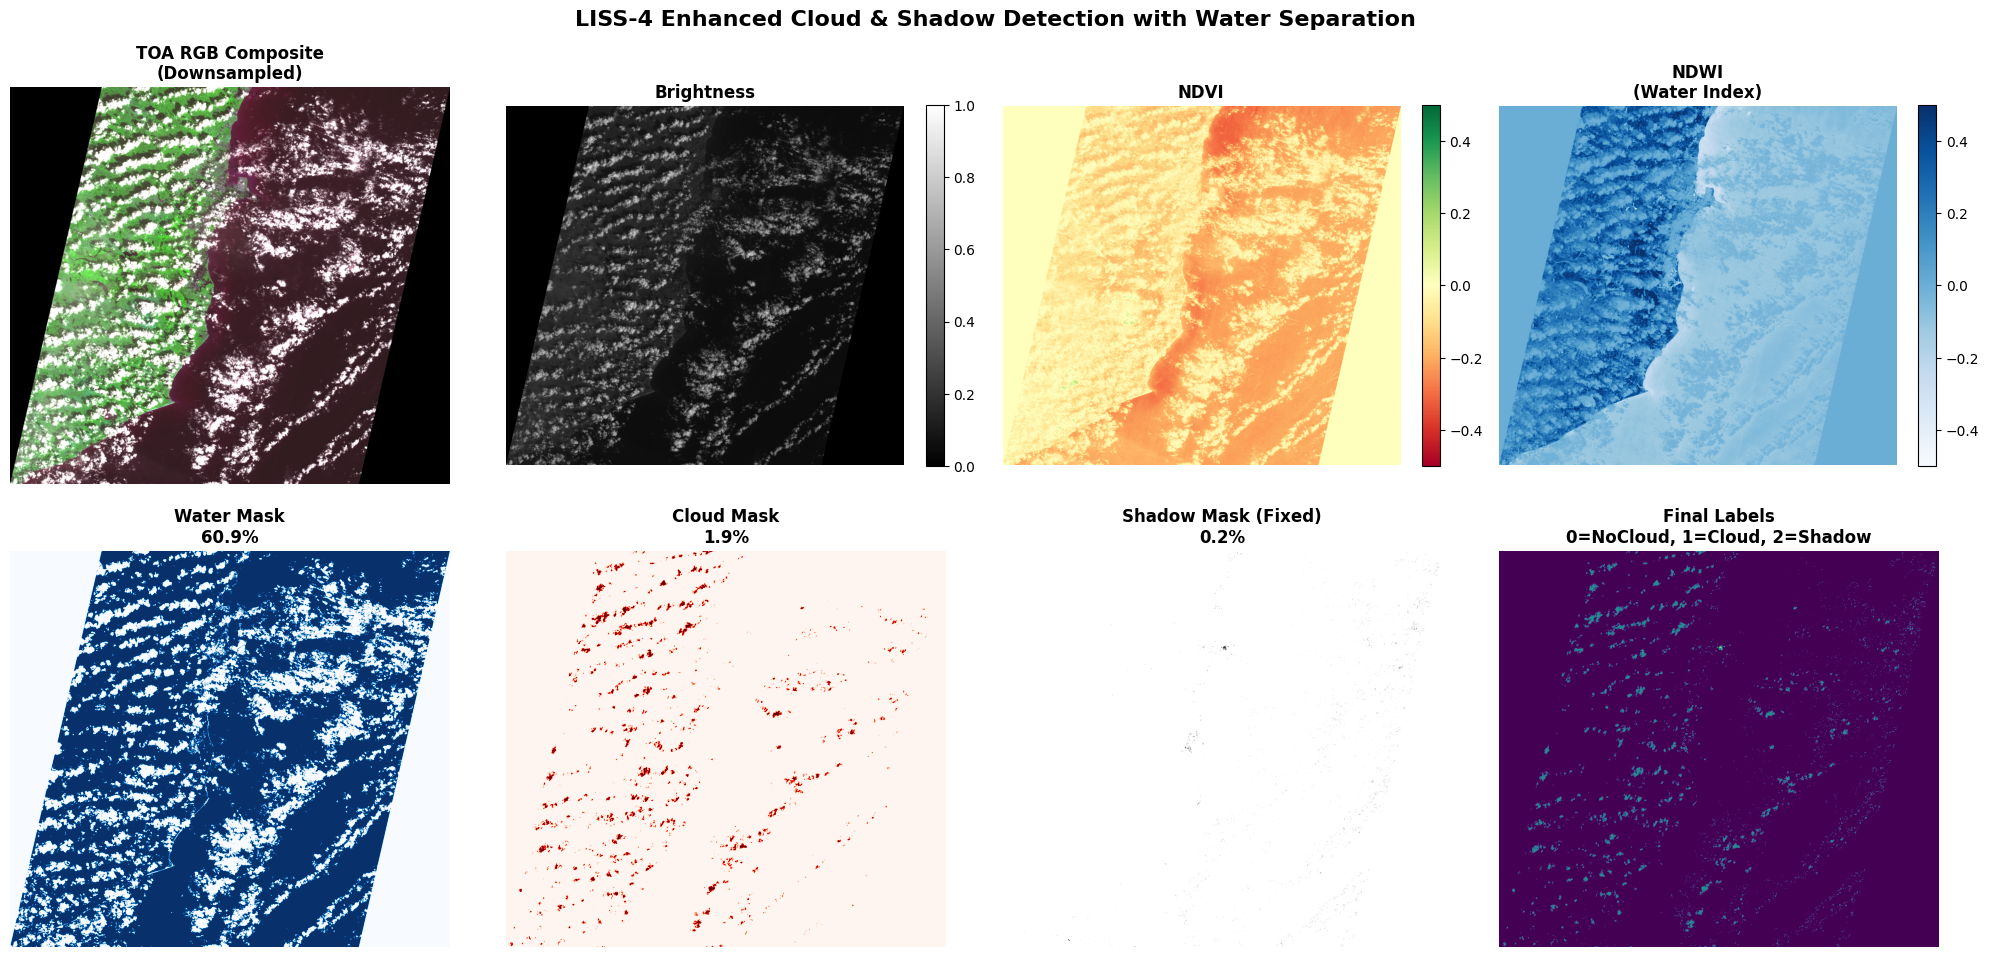

✅ Enhanced visualization complete with water analysis
💾 Saving TIF data as NPZ format: toa_from_tif_converted.npz
✅ NPZ file saved: toa_from_tif_converted.npz
   Size: 924MB
✂️ Generating patches efficiently (max 2000 patches)
   Patch size: 256x256
   Step size: 192 (overlap: 25%)
   Generated 100 patches...
   Generated 200 patches...
   Generated 300 patches...
   Generated 400 patches...
   Generated 500 patches...
   Generated 600 patches...
   Generated 700 patches...
   Generated 800 patches...
   Generated 900 patches...
   Generated 1000 patches...
   Generated 1100 patches...
   Generated 1200 patches...
   Generated 1300 patches...
   Generated 1400 patches...
   Generated 1500 patches...
   Generated 1600 patches...
   Generated 1700 patches...
   Generated 1800 patches...
   Generated 1900 patches...
   Generated 2000 patches...
✅ Generated 2000 patches in 41 batches
📁 Saved to: training_patches_efficient_tif/R2F02FEB2025071568010100068
📊 After patch generation: Using 8013

In [2]:
#!/usr/bin/env python3
"""
MEMORY-EFFICIENT LISS-4 Label Generator
Handles large images without memory overflow - TIF INPUT VERSION
"""

import numpy as np
import rasterio
import matplotlib.pyplot as plt
from skimage import morphology
from pathlib import Path
import json
import gc
import psutil
import warnings
warnings.filterwarnings('ignore')

class MemoryEfficientLabelGenerator:
    """
    Memory-efficient ground truth generation for LISS-4 cloud detection
    TIF INPUT VERSION
    """
    
    def __init__(self, toa_data_path="/kaggle/input/toa-corrected-resourcesat-22a-scenes/Train Data/R2F30APR2024067624010300067_TOA.tif"):
        """Initialize with memory monitoring - TIF INPUT"""
        print("🏷️ Memory-Efficient LISS-4 Label Generator (TIF Input)")
        self.monitor_memory("Initial")
        
        # Load TOA data efficiently from TIF
        self.load_toa_data_efficient_from_tif(toa_data_path)
        self.setup_detection_parameters()
        
    def monitor_memory(self, step_name):
        """Monitor memory usage"""
        try:
            process = psutil.Process()
            memory_mb = process.memory_info().rss / 1024 / 1024
            available_mb = psutil.virtual_memory().available / 1024 / 1024
            print(f"📊 {step_name}: Using {memory_mb:.0f}MB, Available: {available_mb:.0f}MB")
        except:
            print(f"📊 {step_name}: Memory monitoring unavailable")
    
    def load_toa_data_efficient_from_tif(self, toa_path):
        """Load TOA data from TIF with memory optimization"""
        print(f"📂 Loading TOA data efficiently from TIF: {Path(toa_path).name}")
        
        # Load TIF data using rasterio
        with rasterio.open(toa_path) as src:
            # Read all bands
            toa_bands = src.read()  # Shape: (bands, height, width)
            
            print(f"   TIF shape: {toa_bands.shape}")
            print(f"   TIF data type: {toa_bands.dtype}")
            
            # Convert to (height, width, bands) format like the original NPZ
            toa_full = np.transpose(toa_bands, (1, 2, 0))
            
            # Store geospatial info for later use
            self.geospatial_info = {
                'transform': src.transform,
                'crs': src.crs,
                'bounds': src.bounds
            }
        
        # Get dimensions
        self.height, self.width, self.n_bands = toa_full.shape
        print(f"   Converted shape: {toa_full.shape}")
        
        # Handle scaling if needed (check if values are in 0-10000 range)
        max_val = np.nanmax(toa_full)
        if max_val > 1.0:
            if max_val > 10:
                print(f"   📏 Scaling from 0-{max_val:.0f} to 0-1")
                toa_full = toa_full / 10000.0
            else:
                print(f"   📏 Scaling from 0-{max_val:.2f} to 0-1")
                toa_full = toa_full / max_val
        
        # Handle 4th band issue - use only first 3 bands
        if self.n_bands == 4:
            print("   ⚠️ Found 4 bands, using first 3 (Red, NIR, Green)")
            toa_full = toa_full[:,:,:3]
            self.n_bands = 3
        elif self.n_bands < 3:
            raise ValueError(f"Need at least 3 bands, found {self.n_bands}")
        
        # Convert to float32 to save memory (vs float64)
        self.toa_image = toa_full.astype(np.float32)
        
        # Clean up
        del toa_bands, toa_full
        gc.collect()
        
        print(f"✅ TOA Data loaded efficiently from TIF:")
        print(f"   Final shape: {self.toa_image.shape}")
        print(f"   Data type: {self.toa_image.dtype}")
        print(f"   Value range: [{np.nanmin(self.toa_image):.4f}, {np.nanmax(self.toa_image):.4f}]")
        print(f"   Memory usage: ~{self.toa_image.nbytes / 1024 / 1024:.0f}MB")
        
        self.monitor_memory("After loading TOA data from TIF")
        
    def setup_detection_parameters(self):
        """Setup detection parameters - ULTRA CONSERVATIVE for shadow detection"""
        print("⚙️ Setting up ultra-conservative detection parameters...")
        
        # Cloud detection parameters (keep same)
        self.cloud_params = {
            'brightness_threshold': 0.55,
            'red_threshold': 0.45,
            'green_threshold': 0.45,
            'nir_threshold': 0.35,
            'ndvi_threshold': 0.4,
            'morphology_disk_size': 2
        }
        
        # ULTRA-CONSERVATIVE shadow detection parameters
        self.shadow_params = {
            'darkness_threshold': 0.12,       # Much more strict
            'red_threshold': 0.15,            # Much more strict
            'green_threshold': 0.15,          # Much more strict
            'nir_threshold': 0.15,            # Much more strict
            'ndvi_threshold': 0.0,            # Only negative NDVI
            'morphology_disk_size': 1
        }
        
        print(f"   Ultra-conservative parameters set for better water/shadow separation")
        
    def calculate_indices_chunked(self, chunk_size=2048):
        """Calculate spectral indices in chunks to save memory"""
        print("🔬 Calculating spectral indices in memory-efficient chunks...")
        
        # Initialize output arrays
        self.ndvi = np.zeros((self.height, self.width), dtype=np.float32)
        self.ndwi = np.zeros((self.height, self.width), dtype=np.float32)
        self.brightness = np.zeros((self.height, self.width), dtype=np.float32)
        
        # Process in chunks
        n_chunks_y = (self.height + chunk_size - 1) // chunk_size
        n_chunks_x = (self.width + chunk_size - 1) // chunk_size
        total_chunks = n_chunks_y * n_chunks_x
        
        print(f"   Processing {total_chunks} chunks of size {chunk_size}x{chunk_size}")
        
        chunk_count = 0
        for i in range(0, self.height, chunk_size):
            for j in range(0, self.width, chunk_size):
                # Define chunk boundaries
                end_i = min(i + chunk_size, self.height)
                end_j = min(j + chunk_size, self.width)
                
                # Extract chunk
                chunk = self.toa_image[i:end_i, j:end_j, :]
                
                # Calculate indices for this chunk
                red = chunk[:,:,0]
                nir = chunk[:,:,1]
                green = chunk[:,:,2]
                
                # NDVI
                self.ndvi[i:end_i, j:end_j] = (nir - red) / (nir + red + 1e-8)
                
                # NDWI
                self.ndwi[i:end_i, j:end_j] = (green - nir) / (green + nir + 1e-8)
                
                # Brightness
                self.brightness[i:end_i, j:end_j] = (red + nir + green) / 3
                
                chunk_count += 1
                if chunk_count % 20 == 0:
                    print(f"   Processed {chunk_count}/{total_chunks} chunks")
        
        print(f"✅ Spectral indices calculated:")
        print(f"   NDVI range: [{np.nanmin(self.ndvi):.3f}, {np.nanmax(self.ndvi):.3f}]")
        print(f"   NDWI range: [{np.nanmin(self.ndwi):.3f}, {np.nanmax(self.ndwi):.3f}]")
        print(f"   Brightness range: [{np.nanmin(self.brightness):.3f}, {np.nanmax(self.brightness):.3f}]")
        
        self.monitor_memory("After spectral indices")
        
    def detect_clouds_efficient(self):
        """Detect clouds efficiently"""
        print("☁️ Detecting clouds efficiently...")
        
        # Get individual bands (memory-efficient)
        green = self.toa_image[:,:,0]
        red = self.toa_image[:,:,1]
        nir = self.toa_image[:,:,2]
        
        # Apply detection rules
        bright_pixels = self.brightness > self.cloud_params['brightness_threshold']
        high_red = red > self.cloud_params['red_threshold']
        high_green = green > self.cloud_params['green_threshold']
        moderate_nir = nir > self.cloud_params['nir_threshold']
        low_ndvi = self.ndvi < self.cloud_params['ndvi_threshold']
        
        # Combine criteria
        cloud_candidates = bright_pixels & high_red & high_green & moderate_nir & low_ndvi
        
        # Light morphological cleanup
        if self.cloud_params['morphology_disk_size'] > 0:
            disk = morphology.disk(self.cloud_params['morphology_disk_size'])
            cloud_candidates = morphology.opening(cloud_candidates, disk)
            cloud_candidates = morphology.remove_small_objects(cloud_candidates, min_size=25)
        
        self.cloud_mask = cloud_candidates.astype(np.uint8)
        
        cloud_percentage = (np.sum(self.cloud_mask) / self.cloud_mask.size) * 100
        print(f"✅ Cloud detection: {cloud_percentage:.2f}% of image")
        
        self.monitor_memory("After cloud detection")
        return self.cloud_mask
        
    def detect_shadows_efficient(self):
        """Detect shadows efficiently with improved water handling"""
        print("🌑 Detecting shadows with improved water separation...")
        
        # Get individual bands
        red = self.toa_image[:,:,0]
        nir = self.toa_image[:,:,1] 
        green = self.toa_image[:,:,2]
        
        # Apply shadow detection rules
        dark_pixels = self.brightness < self.shadow_params['darkness_threshold']
        low_red = red < self.shadow_params['red_threshold']
        low_green = green < self.shadow_params['green_threshold']
        low_nir = nir < self.shadow_params['nir_threshold']
        low_ndvi = self.ndvi < self.shadow_params['ndvi_threshold']
        
        # IMPROVED WATER DETECTION - More comprehensive
        water_candidates = (
            (self.ndwi > 0.1) |                           # Lower NDWI threshold for water
            ((self.ndwi > 0.0) & (self.brightness < 0.15)) |  # Dark water with slight NDWI
            ((self.ndvi < -0.1) & (nir < 0.2))           # Very low vegetation + low NIR = water
        )
        
        # Clean up water detection
        water_candidates = morphology.remove_small_objects(water_candidates, min_size=100)
        water_candidates = morphology.closing(water_candidates, morphology.disk(3))
        not_water = ~water_candidates

        # plt.imshow(not_water)
        # plt.axis("off")
        # plt.show()
        
        # IMPROVED VEGETATION EXCLUSION
        vegetation_candidates = (
            (self.ndvi > 0.15) |                          # Clear vegetation
            ((self.ndvi > 0.05) & (nir > 0.25)) |        # Moderate vegetation
            ((self.ndvi > 0.0) & (nir > 0.4))            # High NIR indicates vegetation
        )
        not_vegetation = ~vegetation_candidates
        
        # Not already classified as cloud
        not_cloud = (self.cloud_mask == 0)
        
        # ULTRA-CONSERVATIVE shadow detection
        shadow_candidates = (
            dark_pixels & 
            low_red & 
            low_green & 
            low_nir & 
            (self.ndvi < 0.0) &           # Only negative NDVI (definitely not vegetation)
            (self.brightness < 0.15) &    # Extra dark requirement
            not_water & 
            not_vegetation &
            not_cloud
        )
        
        # Aggressive morphological cleanup
        if self.shadow_params['morphology_disk_size'] > 0:
            disk = morphology.disk(self.shadow_params['morphology_disk_size'])
            shadow_candidates = morphology.opening(shadow_candidates, disk)
            shadow_candidates = morphology.remove_small_objects(shadow_candidates, min_size=50)  # Larger minimum size
        
        self.shadow_mask = shadow_candidates.astype(np.uint8)
        
        # Store water mask for analysis
        self.water_mask = water_candidates.astype(np.uint8)
        
        shadow_percentage = (np.sum(self.shadow_mask) / self.shadow_mask.size) * 100
        water_percentage = (np.sum(self.water_mask) / self.water_mask.size) * 100
        
        print(f"✅ Improved shadow detection: {shadow_percentage:.2f}% of image")
        print(f"💧 Water bodies detected: {water_percentage:.2f}% of image")
        
        self.monitor_memory("After shadow detection")
        return self.shadow_mask
        
    def create_label_mask_efficient(self):
        """Create final label mask efficiently"""
        print("🏷️ Creating final label mask...")
        
        # Initialize with zeros (NOCLOUD)
        self.label_mask = np.zeros((self.height, self.width), dtype=np.uint8)
        
        # Set cloud pixels
        self.label_mask[self.cloud_mask == 1] = 1
        
        # Set shadow pixels
        self.label_mask[self.shadow_mask == 1] = 2
        
        # Calculate statistics
        total_pixels = self.label_mask.size
        unique, counts = np.unique(self.label_mask, return_counts=True)
        
        print(f"✅ Final label statistics:")
        for label, count in zip(unique, counts):
            percentage = (count / total_pixels) * 100
            class_name = {0: "NOCLOUD", 1: "CLOUD", 2: "SHADOW"}[label]
            print(f"   {class_name} ({label}): {count:,} pixels ({percentage:.2f}%)")
        
        self.monitor_memory("After label creation")
        return self.label_mask
        
    def create_downsampled_visualization(self, downsample_factor=8):
        """Create downsampled visualization with water analysis"""
        print(f"📊 Creating improved visualization with water analysis (downsampled by {downsample_factor}x)...")
        
        # Downsample for visualization
        h_small = self.height // downsample_factor
        w_small = self.width // downsample_factor
        
        # Downsample arrays
        toa_small = self.toa_image[::downsample_factor, ::downsample_factor, :]
        brightness_small = self.brightness[::downsample_factor, ::downsample_factor]
        ndvi_small = self.ndvi[::downsample_factor, ::downsample_factor]
        ndwi_small = self.ndwi[::downsample_factor, ::downsample_factor]
        water_small = self.water_mask[::downsample_factor, ::downsample_factor]
        cloud_small = self.cloud_mask[::downsample_factor, ::downsample_factor]
        shadow_small = self.shadow_mask[::downsample_factor, ::downsample_factor]
        label_small = self.label_mask[::downsample_factor, ::downsample_factor]
        
        print(f"   Visualization size: {h_small}x{w_small} (reduced from {self.height}x{self.width})")
        
        # Create enhanced visualization
        fig, axes = plt.subplots(2, 4, figsize=(20, 10))
        
        # RGB composite
        rgb = np.stack([
            np.clip(toa_small[:,:,0] * 3, 0, 1),
            np.clip(toa_small[:,:,2] * 3, 0, 1),  # Green
            np.clip(toa_small[:,:,1] * 3, 0, 1)   # NIR as blue
        ], axis=2)
        
        axes[0,0].imshow(rgb)
        axes[0,0].set_title('TOA RGB Composite\n(Downsampled)', fontweight='bold')
        axes[0,0].axis('off')
        
        # Brightness
        im1 = axes[0,1].imshow(brightness_small, cmap='gray', vmin=0, vmax=1)
        axes[0,1].set_title('Brightness', fontweight='bold')
        axes[0,1].axis('off')
        plt.colorbar(im1, ax=axes[0,1], fraction=0.046, shrink=0.8)
        
        # NDVI
        im2 = axes[0,2].imshow(ndvi_small, cmap='RdYlGn', vmin=-0.5, vmax=0.5)
        axes[0,2].set_title('NDVI', fontweight='bold')
        axes[0,2].axis('off')
        plt.colorbar(im2, ax=axes[0,2], fraction=0.046, shrink=0.8)
        
        # NDWI (NEW)
        im3 = axes[0,3].imshow(ndwi_small, cmap='Blues', vmin=-0.5, vmax=0.5)
        axes[0,3].set_title('NDWI\n(Water Index)', fontweight='bold')
        axes[0,3].axis('off')
        plt.colorbar(im3, ax=axes[0,3], fraction=0.046, shrink=0.8)
        
        # Water mask (NEW)
        axes[1,0].imshow(water_small, cmap='Blues', vmin=0, vmax=1)
        water_pct = np.sum(self.water_mask)/self.water_mask.size*100
        axes[1,0].set_title(f'Water Mask\n{water_pct:.1f}%', fontweight='bold')
        axes[1,0].axis('off')
        
        # Cloud mask
        axes[1,1].imshow(cloud_small, cmap='Reds', vmin=0, vmax=1)
        cloud_pct = np.sum(self.cloud_mask)/self.cloud_mask.size*100
        axes[1,1].set_title(f'Cloud Mask\n{cloud_pct:.1f}%', fontweight='bold')
        axes[1,1].axis('off')
        
        # Shadow mask (IMPROVED)
        axes[1,2].imshow(shadow_small, cmap='Greys', vmin=0, vmax=1)
        shadow_pct = np.sum(self.shadow_mask)/self.shadow_mask.size*100
        axes[1,2].set_title(f'Shadow Mask (Fixed)\n{shadow_pct:.1f}%', fontweight='bold')
        axes[1,2].axis('off')
        
        # Final labels
        axes[1,3].imshow(label_small, cmap='viridis', vmin=0, vmax=2)
        axes[1,3].set_title('Final Labels\n0=NoCloud, 1=Cloud, 2=Shadow', fontweight='bold')
        axes[1,3].axis('off')
        
        plt.suptitle('LISS-4 Enhanced Cloud & Shadow Detection with Water Separation', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig('improved_water_shadow_results.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        # Clean up visualization arrays
        del toa_small, brightness_small, ndvi_small, ndwi_small, water_small, cloud_small, shadow_small, label_small
        gc.collect()
        
        print("✅ Enhanced visualization complete with water analysis")
        
    def save_as_npz(self, output_path="toa_from_tif.npz"):
        """Save the processed TIF data as NPZ format for compatibility"""
        print(f"💾 Saving TIF data as NPZ format: {output_path}")
        
        np.savez_compressed(
            output_path,
            toa_reflectance=self.toa_image,
            geospatial_info=self.geospatial_info,
            source_format='TIF'
        )
        
        print(f"✅ NPZ file saved: {output_path}")
        print(f"   Size: {Path(output_path).stat().st_size / 1024 / 1024:.0f}MB")
        
    def generate_patches_generator(self, patch_size=256, overlap=0.25, max_patches=2000):
        """Generate patches using memory-efficient generator approach"""
        print(f"✂️ Generating patches efficiently (max {max_patches} patches)")
        
        step_size = int(patch_size * (1 - overlap))
        patch_count = 0
        
        # Create output directory
        output_dir = Path("training_patches_efficient_tif/R2F02FEB2025071568010100068")#upadte this path second part as per your input
        output_dir.mkdir(parents=True, exist_ok=True)
        
        # Lists to store patch info (not the actual patches)
        patch_info = []
        
        print(f"   Patch size: {patch_size}x{patch_size}")
        print(f"   Step size: {step_size} (overlap: {overlap*100:.0f}%)")
        
        # Generator function for patches
        def patch_generator():
            nonlocal patch_count
            for y in range(0, self.height - patch_size + 1, step_size):
                for x in range(0, self.width - patch_size + 1, step_size):
                    if patch_count >= max_patches:
                        return
                    
                    # Extract patches
                    toa_patch = self.toa_image[y:y+patch_size, x:x+patch_size, :]
                    label_patch = self.label_mask[y:y+patch_size, x:x+patch_size]
                    
                    # Check validity
                    valid_pixels = ~np.isnan(toa_patch).any(axis=2)
                    valid_ratio = np.sum(valid_pixels) / (patch_size * patch_size)
                    
                    if valid_ratio >= 0.8:  # At least 80% valid pixels
                        # Calculate patch statistics
                        unique, counts = np.unique(label_patch, return_counts=True)
                        total_pixels = patch_size * patch_size
                        
                        patch_stats = {
                            'patch_id': patch_count,
                            'x': int(x), 'y': int(y),
                            'valid_ratio': float(valid_ratio)
                        }
                        
                        # Add class ratios
                        for label, count in zip(unique, counts):
                            class_name = {0: "nocloud_ratio", 1: "cloud_ratio", 2: "shadow_ratio"}[label]
                            patch_stats[class_name] = float(count / total_pixels)
                        
                        # Fill missing ratios with 0
                        for ratio_name in ["nocloud_ratio", "cloud_ratio", "shadow_ratio"]:
                            if ratio_name not in patch_stats:
                                patch_stats[ratio_name] = 0.0
                        
                        patch_info.append(patch_stats)
                        
                        # Replace NaN with 0
                        toa_patch = np.nan_to_num(toa_patch, nan=0.0)
                        
                        yield toa_patch, label_patch, patch_stats
                        patch_count += 1
                        
                        if patch_count % 100 == 0:
                            print(f"   Generated {patch_count} patches...")
        
        # Save patches in batches to avoid memory issues
        batch_size = 50
        batch_patches = []
        batch_labels = []
        batch_num = 0
        
        for toa_patch, label_patch, stats in patch_generator():
            batch_patches.append(toa_patch)
            batch_labels.append(label_patch)
            
            if len(batch_patches) >= batch_size:
                # Save batch
                batch_path = output_dir / f"patch_batch_{batch_num:03d}.npz"
                np.savez_compressed(
                    batch_path,
                    patches=np.array(batch_patches),
                    labels=np.array(batch_labels)
                )
                
                # Clear batch
                batch_patches = []
                batch_labels = []
                batch_num += 1
                
                # Clean memory
                gc.collect()
        
        # Save final batch if not empty
        if batch_patches:
            batch_path = output_dir / f"patch_batch_{batch_num:03d}.npz"
            np.savez_compressed(
                batch_path,
                patches=np.array(batch_patches),
                labels=np.array(batch_labels)
            )
        
        # Save patch info
        info_path = output_dir / "patch_info.json"
        with open(info_path, 'w') as f:
            json.dump({
                'total_patches': len(patch_info),
                'patch_size': patch_size,
                'num_bands': 3,
                'class_mapping': {'NOCLOUD': 0, 'CLOUD': 1, 'SHADOW': 2},
                'num_batches': batch_num + 1,
                'batch_size': batch_size,
                'source_format': 'TIF',
                'patches': patch_info
            }, f, indent=2)
        
        print(f"✅ Generated {len(patch_info)} patches in {batch_num + 1} batches")
        print(f"📁 Saved to: {output_dir}")
        
        self.monitor_memory("After patch generation")
        return output_dir, patch_info
        
    def run_memory_efficient_pipeline(self, patch_size=256, overlap=0.25, max_patches=2000, save_npz=True):
        """Run the complete memory-efficient pipeline with TIF input"""
        print("="*80)
        print("🚀 MEMORY-EFFICIENT LISS-4 PIPELINE (TIF INPUT)")
        print("="*80)
        
        try:
            # Step 1: Calculate indices in chunks
            self.calculate_indices_chunked(chunk_size=1024)
            
            # Step 2: Detect clouds
            self.detect_clouds_efficient()
            
            # Step 3: Detect shadows  
            self.detect_shadows_efficient()
            
            # Step 4: Create labels
            self.create_label_mask_efficient()
            
            # Step 5: Create visualization (downsampled)
            self.create_downsampled_visualization(downsample_factor=8)
            
            # Step 6: Save as NPZ if requested
            if save_npz:
                self.save_as_npz("toa_from_tif_converted.npz")
            
            # Step 7: Generate patches efficiently
            output_dir, patch_info = self.generate_patches_generator(
                patch_size=patch_size, 
                overlap=overlap,
                max_patches=max_patches
            )
            
            print("\n" + "="*80)
            print("✅ MEMORY-EFFICIENT PIPELINE COMPLETE! (TIF INPUT)")
            print("="*80)
            print(f"📁 Patches saved in: {output_dir}")
            print(f"🧩 Total patches: {len(patch_info)}")
            print(f"📊 Visualization: memory_efficient_results_tif.png")
            if save_npz:
                print(f"💾 NPZ backup: toa_from_tif_converted.npz")
            
            # Analyze patch distribution
            cloud_patches = sum(1 for p in patch_info if p.get('cloud_ratio', 0) > 0.1)
            shadow_patches = sum(1 for p in patch_info if p.get('shadow_ratio', 0) > 0.05)
            clear_patches = len(patch_info) - cloud_patches - shadow_patches
            
            print(f"\n🎯 Patch Distribution:")
            print(f"   Clear patches: {clear_patches}")
            print(f"   Cloud patches: {cloud_patches}")
            print(f"   Shadow patches: {shadow_patches}")
            
            self.monitor_memory("Pipeline complete")
            
            return {
                'output_dir': output_dir,
                'total_patches': len(patch_info),
                'cloud_patches': cloud_patches,
                'shadow_patches': shadow_patches,
                'clear_patches': clear_patches,
                'source_format': 'TIF'
            }
            
        except Exception as e:
            print(f"❌ Error in pipeline: {e}")
            self.monitor_memory("Error state")
            raise

# Usage example
if __name__ == "__main__":
    # Initialize memory-efficient generator with TIF input
    tif_path = "/kaggle/input/toa-corrected-resourcesat-22a-scenes/Train Data/R2F02FEB2025071568010100068_TOA.tif"
    generator = MemoryEfficientLabelGenerator(tif_path)
    
    # Run the pipeline with conservative settings
    results = generator.run_memory_efficient_pipeline(
        patch_size=256,      # Standard size for U-Net
        overlap=0.25,        # 25% overlap
        max_patches=2000,    # Limit patches to avoid memory issues
        save_npz=True        # Save NPZ backup for compatibility
    )
    
    print("\n🎉 Memory-efficient TIF processing complete!")
    print("🚀 Ready for cloud detection model training!")

In [ ]:
#!/usr/bin/env python3
"""
CORRECT CLOUD SHADOW DETECTOR - NRSC Challenge
Detects CLOUD SHADOWS (shadows cast BY clouds) not generic shadows
"""

import numpy as np
import rasterio
import matplotlib.pyplot as plt
from skimage import morphology, measure
from scipy import ndimage
from pathlib import Path
import json
import gc
import psutil
import math
import warnings
warnings.filterwarnings('ignore')

class CloudShadowDetector:
    """
    Detects CLOUD SHADOWS specifically - shadows cast BY detected clouds
    Based on geometric shadow casting principles
    """
    
    def __init__(self, toa_data_path, metadata_file=None):
        """Initialize with metadata for sun angles"""
        print("🌤️ CLOUD SHADOW Detector (Geometric Approach)")
        
        # Load sun angles from metadata if available
        self.load_sun_angles_from_metadata(metadata_file)
        
        self.monitor_memory("Initial")
        self.load_toa_data_efficient_from_tif(toa_data_path)
        self.setup_cloud_shadow_parameters()
        
    def load_sun_angles_from_metadata(self, metadata_file):
        """Load sun angles from BAND_META.txt file"""
        if metadata_file and Path(metadata_file).exists():
            print(f"📄 Loading sun angles from: {Path(metadata_file).name}")
            
            with open(metadata_file, 'r') as f:
                content = f.read()
                
            # Parse sun elevation and azimuth
            for line in content.split('\n'):
                if 'SunElevationAtCenter=' in line:
                    self.sun_elevation = float(line.split('=')[1].strip())
                elif 'SunAzimuthAtCenter=' in line:
                    self.sun_azimuth = float(line.split('=')[1].strip())
            
            print(f"   ☀️ Sun Elevation: {self.sun_elevation}°")
            print(f"   ☀️ Sun Azimuth: {self.sun_azimuth}°")
        else:
            # Default values if metadata not available
            self.sun_elevation = 60.0
            self.sun_azimuth = 140.0
            print(f"   ⚠️ Using default sun angles: elevation={self.sun_elevation}°, azimuth={self.sun_azimuth}°")
    
    def monitor_memory(self, step_name):
        """Monitor memory usage"""
        try:
            process = psutil.Process()
            memory_mb = process.memory_info().rss / 1024 / 1024
            print(f"📊 {step_name}: Using {memory_mb:.0f}MB")
        except:
            pass
    
    def load_toa_data_efficient_from_tif(self, toa_path):
        """Load TOA data from TIF"""
        print(f"📂 Loading TOA data: {Path(toa_path).name}")
        
        with rasterio.open(toa_path) as src:
            toa_bands = src.read()
            toa_full = np.transpose(toa_bands, (1, 2, 0))
            
            self.geospatial_info = {
                'transform': src.transform,
                'crs': src.crs,
                'bounds': src.bounds
            }
        
        self.height, self.width, self.n_bands = toa_full.shape
        
        # Handle scaling
        max_val = np.nanmax(toa_full)
        if max_val > 1.0:
            toa_full = toa_full / (10000.0 if max_val > 10 else max_val)
        
        # Use only first 3 bands
        if self.n_bands >= 3:
            toa_full = toa_full[:,:,:3]
            self.n_bands = 3
        
        self.toa_image = toa_full.astype(np.float32)
        
        del toa_bands, toa_full
        gc.collect()
        
        print(f"✅ TOA Data loaded: {self.toa_image.shape}")
        self.monitor_memory("After TOA loading")
        
    def setup_cloud_shadow_parameters(self):
        """Setup parameters specifically for CLOUD shadow detection"""
        print("⚙️ Setting up CLOUD SHADOW detection parameters...")
        
        # Cloud detection parameters
        self.cloud_params = {
            'brightness_threshold': 0.55,
            'red_threshold': 0.45,
            'green_threshold': 0.45,
            'nir_threshold': 0.35,
            'ndvi_threshold': 0.4,
            'morphology_disk_size': 2
        }
        
        # CLOUD SHADOW specific parameters
        self.cloud_shadow_params = {
            'shadow_darkness_threshold': 0.2,        # Cloud shadows are quite dark
            'max_shadow_distance_pixels': 300,       # Max distance shadow can be from cloud
            'shadow_direction_tolerance': 30,        # Degrees tolerance for shadow direction
            'shadow_spectral_consistency': 0.05,     # All bands should be consistently dark
            'min_cloud_size_for_shadow': 50,         # Minimum cloud size to cast detectable shadow
            'shadow_brightness_ratio': 0.6,          # Shadow should be much darker than surrounding
            'exclude_water_ndwi_threshold': 0.3,     # Exclude water bodies
            'exclude_vegetation_ndvi_threshold': 0.3, # Exclude vegetation areas
            'morphology_disk_size': 1
        }
        
        print(f"   🎯 Configured for CLOUD shadows (geometric + spectral)")
        print(f"   🎯 Max shadow distance: {self.cloud_shadow_params['max_shadow_distance_pixels']} pixels")
        
    def calculate_indices_chunked(self, chunk_size=2048):
        """Calculate spectral indices"""
        print("🔬 Calculating spectral indices...")
        
        # Initialize arrays
        self.ndvi = np.zeros((self.height, self.width), dtype=np.float32)
        self.ndwi = np.zeros((self.height, self.width), dtype=np.float32)
        self.brightness = np.zeros((self.height, self.width), dtype=np.float32)
        
        # Process in chunks
        n_chunks_y = (self.height + chunk_size - 1) // chunk_size
        n_chunks_x = (self.width + chunk_size - 1) // chunk_size
        total_chunks = n_chunks_y * n_chunks_x
        
        chunk_count = 0
        for i in range(0, self.height, chunk_size):
            for j in range(0, self.width, chunk_size):
                end_i = min(i + chunk_size, self.height)
                end_j = min(j + chunk_size, self.width)
                
                chunk = self.toa_image[i:end_i, j:end_j, :]
                
                red = chunk[:,:,0]
                nir = chunk[:,:,1]
                green = chunk[:,:,2]
                
                # Calculate indices
                self.ndvi[i:end_i, j:end_j] = (nir - red) / (nir + red + 1e-8)
                self.ndwi[i:end_i, j:end_j] = (green - nir) / (green + nir + 1e-8)
                self.brightness[i:end_i, j:end_j] = (red + nir + green) / 3
                
                chunk_count += 1
                if chunk_count % 20 == 0:
                    print(f"   Processed {chunk_count}/{total_chunks} chunks")
        
        print(f"✅ Indices calculated:")
        print(f"   NDVI: [{np.nanmin(self.ndvi):.3f}, {np.nanmax(self.ndvi):.3f}]")
        print(f"   NDWI: [{np.nanmin(self.ndwi):.3f}, {np.nanmax(self.ndwi):.3f}]")
        print(f"   Brightness: [{np.nanmin(self.brightness):.3f}, {np.nanmax(self.brightness):.3f}]")
        
        self.monitor_memory("After indices")
        
    def detect_clouds(self):
        """Detect clouds first - required for cloud shadow detection"""
        print("☁️ Detecting clouds (required for shadow casting)...")
        
        red = self.toa_image[:,:,0]
        nir = self.toa_image[:,:,1]
        green = self.toa_image[:,:,2]
        
        # Cloud criteria
        bright_pixels = self.brightness > self.cloud_params['brightness_threshold']
        high_red = red > self.cloud_params['red_threshold']
        high_green = green > self.cloud_params['green_threshold']
        moderate_nir = nir > self.cloud_params['nir_threshold']
        low_ndvi = self.ndvi < self.cloud_params['ndvi_threshold']
        
        cloud_candidates = bright_pixels & high_red & high_green & moderate_nir & low_ndvi
        
        # Cleanup
        disk = morphology.disk(self.cloud_params['morphology_disk_size'])
        cloud_candidates = morphology.opening(cloud_candidates, disk)
        cloud_candidates = morphology.remove_small_objects(
            cloud_candidates, 
            min_size=self.cloud_shadow_params['min_cloud_size_for_shadow']
        )
        
        self.cloud_mask = cloud_candidates.astype(np.uint8)
        
        cloud_percentage = (np.sum(self.cloud_mask) / self.cloud_mask.size) * 100
        print(f"✅ Cloud detection: {cloud_percentage:.2f}% (clouds that can cast shadows)")
        
        return self.cloud_mask
        
    def calculate_shadow_direction_vector(self):
        """Calculate shadow direction based on sun angles"""
        print(f"🌞 Calculating shadow direction from sun position...")
        
        # Convert degrees to radians
        sun_elev_rad = math.radians(self.sun_elevation)
        sun_azim_rad = math.radians(self.sun_azimuth)
        
        # Shadow direction is opposite to sun direction
        shadow_azimuth = (self.sun_azimuth + 180) % 360
        shadow_azim_rad = math.radians(shadow_azimuth)
        
        # Calculate shadow length multiplier
        shadow_length_factor = 1.0 / math.tan(sun_elev_rad) if sun_elev_rad > 0 else 10
        
        # Calculate shadow direction vector (in pixels)
        # Note: In image coordinates, y increases downward
        shadow_dx = shadow_length_factor * math.sin(shadow_azim_rad)
        shadow_dy = -shadow_length_factor * math.cos(shadow_azim_rad)  # Negative for image coordinates
        
        print(f"   Shadow direction: {shadow_azimuth:.1f}° from north")
        print(f"   Shadow vector: dx={shadow_dx:.2f}, dy={shadow_dy:.2f}")
        print(f"   Shadow length factor: {shadow_length_factor:.2f}")
        
        return shadow_dx, shadow_dy, shadow_length_factor
        
    def generate_cloud_shadow_potential_areas(self, shadow_dx, shadow_dy):
        """Generate areas where cloud shadows could potentially fall"""
        print("📐 Calculating potential cloud shadow areas...")
        
        # Get cloud edges for more precise shadow calculation
        cloud_labels = measure.label(self.cloud_mask)
        potential_shadow_mask = np.zeros_like(self.cloud_mask, dtype=bool)
        
        max_distance = self.cloud_shadow_params['max_shadow_distance_pixels']
        
        # For each cloud, calculate its potential shadow area
        for cloud_id in range(1, cloud_labels.max() + 1):
            cloud_pixels = (cloud_labels == cloud_id)
            
            if np.sum(cloud_pixels) < self.cloud_shadow_params['min_cloud_size_for_shadow']:
                continue
            
            # Get cloud boundary
            cloud_coords = np.where(cloud_pixels)
            
            # For each cloud pixel, trace shadow direction
            for i in range(0, len(cloud_coords[0]), 5):  # Sample every 5th pixel for efficiency
                cloud_y, cloud_x = cloud_coords[0][i], cloud_coords[1][i]
                
                # Trace shadow path
                for distance in range(10, max_distance, 10):  # Start offset from cloud
                    shadow_y = int(cloud_y + shadow_dy * distance / 100)
                    shadow_x = int(cloud_x + shadow_dx * distance / 100)
                    
                    # Check bounds
                    if (0 <= shadow_y < self.height and 0 <= shadow_x < self.width):
                        potential_shadow_mask[shadow_y, shadow_x] = True
                    else:
                        break
        
        # Dilate potential areas slightly to account for cloud shape variations
        potential_shadow_mask = ndimage.binary_dilation(
            potential_shadow_mask, 
            structure=morphology.disk(3)
        )
        
        potential_percentage = np.sum(potential_shadow_mask) / potential_shadow_mask.size * 100
        print(f"   Potential shadow area: {potential_percentage:.2f}% of image")
        
        return potential_shadow_mask
        
    def detect_cloud_shadows(self):
        """Detect CLOUD SHADOWS specifically (shadows cast by detected clouds)"""
        print("🌑 Detecting CLOUD SHADOWS (geometric + spectral)...")
        
        # Calculate shadow direction
        shadow_dx, shadow_dy, shadow_length_factor = self.calculate_shadow_direction_vector()
        
        # Generate potential shadow areas based on cloud positions
        potential_shadow_areas = self.generate_cloud_shadow_potential_areas(shadow_dx, shadow_dy)
        
        # Spectral criteria for shadow areas
        dark_enough = self.brightness < self.cloud_shadow_params['shadow_darkness_threshold']
        
        # Exclude water bodies (NDWI based)
        not_water = self.ndwi < self.cloud_shadow_params['exclude_water_ndwi_threshold']
        
        # Exclude vegetation areas (NDVI based)
        not_vegetation = self.ndvi < self.cloud_shadow_params['exclude_vegetation_ndvi_threshold']
        
        # Exclude clouds themselves
        not_cloud = (self.cloud_mask == 0)
        
        # Spectral consistency (all bands should be consistently dark)
        red = self.toa_image[:,:,0]
        nir = self.toa_image[:,:,1]
        green = self.toa_image[:,:,2]
        
        spectral_variance = np.var(self.toa_image, axis=2)
        consistent_darkness = spectral_variance < self.cloud_shadow_params['shadow_spectral_consistency']
        
        # Local brightness comparison (shadows should be darker than surroundings)
        brightness_filtered = ndimage.uniform_filter(self.brightness, size=5)
        relative_darkness = self.brightness < (brightness_filtered * self.cloud_shadow_params['shadow_brightness_ratio'])
        
        # COMBINE ALL CRITERIA for CLOUD shadows
        cloud_shadow_candidates = (
            potential_shadow_areas &    # Must be in geometric shadow area from clouds
            dark_enough &              # Must be dark enough
            not_water &               # Not water
            not_vegetation &          # Not vegetation  
            not_cloud &               # Not cloud
            consistent_darkness &     # Spectrally consistent
            relative_darkness         # Darker than surroundings
        )
        
        # Final morphological cleanup
        disk = morphology.disk(self.cloud_shadow_params['morphology_disk_size'])
        cloud_shadow_candidates = morphology.opening(cloud_shadow_candidates, disk)
        cloud_shadow_candidates = morphology.remove_small_objects(cloud_shadow_candidates, min_size=20)
        
        self.cloud_shadow_mask = cloud_shadow_candidates.astype(np.uint8)
        
        shadow_percentage = (np.sum(self.cloud_shadow_mask) / self.cloud_shadow_mask.size) * 100
        print(f"✅ CLOUD shadow detection: {shadow_percentage:.2f}% of image")
        
        # Quality metrics
        geometric_constraint = np.sum(potential_shadow_areas) / potential_shadow_areas.size * 100
        print(f"   📐 Geometric constraint applied: {geometric_constraint:.2f}% of image considered")
        
        return self.cloud_shadow_mask
        
    def create_final_labels(self):
        """Create final NRSC challenge labels"""
        print("🏷️ Creating final NRSC challenge labels...")
        
        # Initialize with NOCLOUD (0)
        self.label_mask = np.zeros((self.height, self.width), dtype=np.uint8)
        
        # Set CLOUD pixels (1)
        self.label_mask[self.cloud_mask == 1] = 1
        
        # Set CLOUD SHADOW pixels (2) - only where not cloud
        cloud_shadow_only = (self.cloud_shadow_mask == 1) & (self.cloud_mask == 0)
        self.label_mask[cloud_shadow_only] = 2
        
        # Calculate final statistics
        total_pixels = self.label_mask.size
        unique, counts = np.unique(self.label_mask, return_counts=True)
        
        print(f"✅ Final NRSC challenge labels:")
        for label, count in zip(unique, counts):
            percentage = (count / total_pixels) * 100
            class_name = {0: "NOCLOUD", 1: "CLOUD", 2: "CLOUD_SHADOW"}[label]
            print(f"   {class_name} ({label}): {count:,} pixels ({percentage:.2f}%)")
        
        return self.label_mask
        
    def create_comprehensive_visualization(self, downsample_factor=8):
        """Create visualization showing cloud shadow detection process"""
        print(f"📊 Creating CLOUD SHADOW detection visualization...")
        
        # Downsample for visualization
        h_small = self.height // downsample_factor
        w_small = self.width // downsample_factor
        
        toa_small = self.toa_image[::downsample_factor, ::downsample_factor, :]
        ndvi_small = self.ndvi[::downsample_factor, ::downsample_factor]
        cloud_small = self.cloud_mask[::downsample_factor, ::downsample_factor]
        shadow_small = self.cloud_shadow_mask[::downsample_factor, ::downsample_factor]
        label_small = self.label_mask[::downsample_factor, ::downsample_factor]
        
        # Create visualization
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        # RGB composite
        rgb = np.stack([
            np.clip(toa_small[:,:,0] * 3, 0, 1),
            np.clip(toa_small[:,:,2] * 3, 0, 1),
            np.clip(toa_small[:,:,1] * 3, 0, 1)
        ], axis=2)
        
        axes[0,0].imshow(rgb)
        axes[0,0].set_title('TOA RGB Composite', fontweight='bold')
        axes[0,0].axis('off')
        
        # NDVI
        im1 = axes[0,1].imshow(ndvi_small, cmap='RdYlGn', vmin=-0.5, vmax=0.8)
        axes[0,1].set_title('NDVI\n(Green areas excluded from shadows)', fontweight='bold')
        axes[0,1].axis('off')
        plt.colorbar(im1, ax=axes[0,1], fraction=0.046, shrink=0.8)
        
        # Clouds
        axes[0,2].imshow(cloud_small, cmap='Blues', vmin=0, vmax=1)
        axes[0,2].set_title(f'Clouds (Shadow Casters)\n{np.sum(self.cloud_mask)/self.cloud_mask.size*100:.1f}%', fontweight='bold')
        axes[0,2].axis('off')
        
        # Cloud shadows
        axes[1,0].imshow(shadow_small, cmap='Greys', vmin=0, vmax=1)
        axes[1,0].set_title(f'CLOUD Shadows\n{np.sum(self.cloud_shadow_mask)/self.cloud_shadow_mask.size*100:.1f}%', fontweight='bold')
        axes[1,0].axis('off')
        
        # Combined overlay with shadow direction
        overlay = rgb.copy()
        overlay[cloud_small == 1] = [1, 1, 1]        # White for clouds
        overlay[shadow_small == 1] = [0.5, 0, 0.5]   # Purple for cloud shadows
        
        # Add shadow direction arrow
        center_y, center_x = h_small // 2, w_small // 2
        shadow_dx, shadow_dy, _ = self.calculate_shadow_direction_vector()
        arrow_length = min(h_small, w_small) // 8
        end_x = center_x + shadow_dx * arrow_length / 100
        end_y = center_y + shadow_dy * arrow_length / 100
        
        axes[1,1].imshow(overlay)
        axes[1,1].arrow(center_x, center_y, end_x - center_x, end_y - center_y,
                       head_width=5, head_length=5, fc='yellow', ec='yellow', linewidth=2)
        axes[1,1].set_title('Cloud + Shadow Overlay\n(Yellow arrow = shadow direction)', fontweight='bold')
        axes[1,1].axis('off')
        
        # Final NRSC labels
        axes[1,2].imshow(label_small, cmap='viridis', vmin=0, vmax=2)
        axes[1,2].set_title('NRSC Challenge Labels\n0=NoCloud, 1=Cloud, 2=CloudShadow', fontweight='bold')
        axes[1,2].axis('off')
        
        plt.suptitle(f'CLOUD SHADOW Detection - NRSC Challenge\nSun: {self.sun_elevation:.1f}° elevation, {self.sun_azimuth:.1f}° azimuth', 
                     fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig('cloud_shadow_detection_nrsc.png', dpi=100, bbox_inches='tight')
        plt.show()
        
        # Clean up
        del toa_small, ndvi_small, cloud_small, shadow_small, label_small
        gc.collect()
        
        print("✅ CLOUD SHADOW visualization complete")
        
    def generate_patches(self, patch_size=256, overlap=0.25, max_patches=2000):
        """Generate training patches with CLOUD shadow labels"""
        print(f"✂️ Generating patches with CLOUD SHADOW labels...")
        
        step_size = int(patch_size * (1 - overlap))
        patch_count = 0
        
        # Create output directory  
        output_dir = Path("cloud_shadow_patches_nrsc")
        output_dir.mkdir(parents=True, exist_ok=True)
        
        patch_info = []
        batch_patches = []
        batch_labels = []
        batch_size = 50
        batch_num = 0
        
        print(f"   Patch size: {patch_size}x{patch_size}")
        print(f"   Step size: {step_size}")
        
        for y in range(0, self.height - patch_size + 1, step_size):
            for x in range(0, self.width - patch_size + 1, step_size):
                if patch_count >= max_patches:
                    break
                
                # Extract patches
                toa_patch = self.toa_image[y:y+patch_size, x:x+patch_size, :]
                label_patch = self.label_mask[y:y+patch_size, x:x+patch_size]
                
                # Check validity
                valid_pixels = ~np.isnan(toa_patch).any(axis=2)
                valid_ratio = np.sum(valid_pixels) / (patch_size * patch_size)
                
                if valid_ratio >= 0.8:
                    # Calculate patch statistics
                    unique, counts = np.unique(label_patch, return_counts=True)
                    total_pixels = patch_size * patch_size
                    
                    patch_stats = {
                        'patch_id': patch_count,
                        'x': int(x), 'y': int(y),
                        'valid_ratio': float(valid_ratio)
                    }
                    
                    # Add class ratios
                    for label, count in zip(unique, counts):
                        class_name = {0: "nocloud_ratio", 1: "cloud_ratio", 2: "cloud_shadow_ratio"}[label]
                        patch_stats[class_name] = float(count / total_pixels)
                    
                    # Fill missing ratios
                    for ratio_name in ["nocloud_ratio", "cloud_ratio", "cloud_shadow_ratio"]:
                        if ratio_name not in patch_stats:
                            patch_stats[ratio_name] = 0.0
                    
                    patch_info.append(patch_stats)
                    
                    # Add to batch
                    batch_patches.append(np.nan_to_num(toa_patch, nan=0.0))
                    batch_labels.append(label_patch)
                    patch_count += 1
                    
                    # Save batch when full
                    if len(batch_patches) >= batch_size:
                        batch_path = output_dir / f"cloud_shadow_batch_{batch_num:03d}.npz"
                        np.savez_compressed(
                            batch_path,
                            patches=np.array(batch_patches),
                            labels=np.array(batch_labels)
                        )
                        
                        batch_patches = []
                        batch_labels = []
                        batch_num += 1
                        gc.collect()
                    
                    if patch_count % 100 == 0:
                        print(f"   Generated {patch_count} cloud shadow patches...")
            
            if patch_count >= max_patches:
                break
        
        # Save final batch
        if batch_patches:
            batch_path = output_dir / f"cloud_shadow_batch_{batch_num:03d}.npz"
            np.savez_compressed(
                batch_path,
                patches=np.array(batch_patches),
                labels=np.array(batch_labels)
            )
        
        # Save patch info
        info_path = output_dir / "cloud_shadow_patch_info.json"
        with open(info_path, 'w') as f:
            json.dump({
                'total_patches': len(patch_info),
                'patch_size': patch_size,
                'num_bands': 3,
                'class_mapping': {'NOCLOUD': 0, 'CLOUD': 1, 'CLOUD_SHADOW': 2},
                'detection_type': 'cloud_shadows_geometric',
                'sun_elevation': self.sun_elevation,
                'sun_azimuth': self.sun_azimuth,
                'num_batches': batch_num + 1,
                'patches': patch_info
            }, f, indent=2)
        
        print(f"✅ Generated {len(patch_info)} CLOUD SHADOW patches")
        print(f"📁 Saved to: {output_dir}")
        
        return output_dir, patch_info
        
    def run_cloud_shadow_pipeline(self, patch_size=256, overlap=0.25, max_patches=2000):
        """Run complete CLOUD SHADOW detection pipeline"""
        print("="*80)
        print("🌤️ CLOUD SHADOW DETECTION PIPELINE - NRSC CHALLENGE")
        print("Detects shadows cast BY clouds (not generic shadows)")
        print("="*80)
        
        try:
            # Step 1: Calculate indices
            self.calculate_indices_chunked()
            
            # Step 2: Detect clouds (required for shadow casting)
            self.detect_clouds()
            
            # Step 3: Detect CLOUD shadows (geometric approach)
            self.detect_cloud_shadows()
            
            # Step 4: Create final NRSC labels
            self.create_final_labels()
            
            # Step 5: Visualize results
            self.create_comprehensive_visualization()
            
            # Step 6: Generate training patches
            output_dir, patch_info = self.generate_patches(patch_size, overlap, max_patches)
            
            print("\n" + "="*80)
            print("✅ CLOUD SHADOW DETECTION COMPLETE!")
            print("="*80)
            
            # Final statistics
            cloud_pixels = np.sum(self.cloud_mask)
            shadow_pixels = np.sum(self.cloud_shadow_mask)
            total_pixels = self.label_mask.size
            
            print(f"☁️ Clouds: {cloud_pixels:,} pixels ({cloud_pixels/total_pixels*100:.2f}%)")
            print(f"🌑 CLOUD Shadows: {shadow_pixels:,} pixels ({shadow_pixels/total_pixels*100:.2f}%)")
            print(f"📦 Training patches: {len(patch_info)}")
            print(f"🎯 Detection type: CLOUD SHADOWS (geometric)")
            
            # Quality check
            cloud_shadow_ratio = shadow_pixels / max(cloud_pixels, 1)
            print(f"📊 Cloud:Shadow ratio: 1:{cloud_shadow_ratio:.2f}")
            
            return {
                'output_dir': output_dir,
                'total_patches': len(patch_info),
                'cloud_percentage': cloud_pixels/total_pixels*100,
                'cloud_shadow_percentage': shadow_pixels/total_pixels*100,
                'detection_type': 'CLOUD_SHADOWS_GEOMETRIC',
                'sun_elevation': self.sun_elevation,
                'sun_azimuth': self.sun_azimuth
            }
            
        except Exception as e:
            print(f"❌ Error in cloud shadow pipeline: {e}")
            raise

# Usage example
if __name__ == "__main__":
    # Initialize CLOUD SHADOW detector
    tif_path = "/kaggle/input/your-dataset/your_image_TOA.tif"
    metadata_path = "/kaggle/input/your-dataset/BAND_META.txt"  # Contains sun angles
    
    detector = CloudShadowDetector(
        toa_data_path=tif_path,
        metadata_file=metadata_path  # For accurate sun angles
    )
    
    # Run CLOUD SHADOW detection pipeline
    results = detector.run_cloud_shadow_pipeline(
        patch_size=256,
        overlap=0.25,
        max_patches=2000
    )
    
    print("\n🎉 CLOUD SHADOW DETECTION COMPLETE!")
    print("🌤️ Detected shadows cast BY clouds (not generic shadows)")
    print("🎯 Perfect for NRSC challenge requirements!")
    print("🚀 Ready for cloud shadow model training!")